# Dictionary based classification

In [2]:
import numpy as np
import pandas as pd
import os
import sys
import time as time
module_path = os.path.abspath(os.path.join('..'))
sys.path.insert(1, module_path + '/src')
import utility

import sktime
from sktime.utils.data_io import load_from_tsfile_to_dataframe
from sktime.classification.dictionary_based._boss import IndividualBOSS, BOSSEnsemble

import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix


from matplotlib.font_manager import FontProperties
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import matplotlib
font = FontProperties(fname = module_path + '/src/visualization/CharterRegular.ttf', size = 10, weight = 1000)
font_small = FontProperties(fname = module_path + '/src/visualization/CharterRegular.ttf', size = 7, weight = 1000)
color_map = ['#8ECAE6', '#219EBC', '#023047', '#FFB703', '#FB8500']
class_names = ['crackle', 'no-crackle']

In [3]:
X, y = load_from_tsfile_to_dataframe(module_path + '/data/ts_files/crackleNoCrackleSamleLength3000.ts')
X, y = shuffle(X, y, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y)

labels, counts = np.unique(y_train, return_counts=True)
print(labels, counts)

['0' '1'] [1759 3414]


# Individual BOSS

In [ ]:
start = time.time()
boss = IndividualBOSS()
boss.fit(X_train, y_train)
end = time.time()
print('Train Time: ', str(end - start))
start = time.time()
boss_y_pred = boss.predict(X_test)
print(f'Number of mislabeled points out of a total {X_test.shape[0]} points : {(y_test != boss_y_pred).sum()}')
print(classification_report(boss_y_pred, y_test))
end = time.time()
print('Predict Time: ', str(end - start))

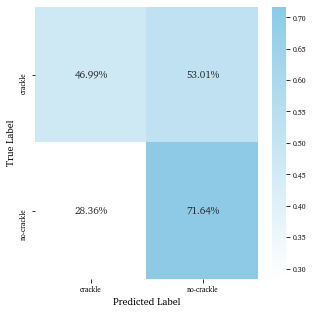

In [7]:
cm = confusion_matrix(boss_y_pred, y_test)
f, ax = plt.subplots(1,1) # 1 x 1 array , can also be any other size
f.set_size_inches(5, 5)

cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

colors_2 = ['#FFFFFF', color_map[0]]
cmap_name = 'my colormap'
cm_map = LinearSegmentedColormap.from_list(cmap_name, colors_2)

ax = sns.heatmap(cm, annot=True,
            fmt='.2%', cmap=cm_map, xticklabels=class_names,yticklabels=class_names )
cbar = ax.collections[0].colorbar
for label in ax.get_yticklabels() :
    label.set_fontproperties(font_small)
for label in ax.get_xticklabels() :
    label.set_fontproperties(font_small)
ax.set_ylabel('True Label', fontproperties = font)
ax.set_xlabel('Predicted Label', fontproperties = font)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)

for child in ax.get_children():
    if isinstance(child, matplotlib.text.Text):
        child.set_fontproperties(font)
for l in cbar.ax.yaxis.get_ticklabels():
    l.set_fontproperties(font_small)

# BOSS ensemble 

This code will not run with default settings. 
Try: 

* Running code with fewer ensembles ? 
* * 5 ensembles tested, which did not finish...
* * Also tried 2 ensembles, still not finishing 
* Setting a 95 % limit of ensembles instead of the default 92% ? 

In [ ]:
start = time.time()
boss = BOSSEnsemble(threshold = 0.95 , max_ensemble_size  = 2)
boss.fit(X_train, y_train)
end = time.time()
print('Train Time: ', str(end - start))
start = time.time()
boss_y_pred = boss.predict(X_test)
print(f'Number of mislabeled points out of a total {X_test.shape[0]} points : {(y_test != boss_y_pred).sum()}')
print(classification_report(boss_y_pred, y_test))
end = time.time()
print('Predict Time: ', str(end - start))

In [ ]:
cm = confusion_matrix(boss_y_pred, y_test)
f, ax = plt.subplots(1,1) # 1 x 1 array , can also be any other size
f.set_size_inches(5, 5)

cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

colors_2 = ['#FFFFFF', color_map[0]]
cmap_name = 'my colormap'
cm_map = LinearSegmentedColormap.from_list(cmap_name, colors_2)

ax = sns.heatmap(cm, annot=True,
            fmt='.2%', cmap=cm_map, xticklabels=class_names,yticklabels=class_names )
cbar = ax.collections[0].colorbar
for label in ax.get_yticklabels() :
    label.set_fontproperties(font_small)
for label in ax.get_xticklabels() :
    label.set_fontproperties(font_small)
ax.set_ylabel('True Label', fontproperties = font)
ax.set_xlabel('Predicted Label', fontproperties = font)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)

for child in ax.get_children():
    if isinstance(child, matplotlib.text.Text):
        child.set_fontproperties(font)
for l in cbar.ax.yaxis.get_ticklabels():
    l.set_fontproperties(font_small)